# Ford GoBike Bike Sharing Exploratory Analysis

### Import Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

from requests import get
from os import path, getcwd, makedirs, listdir 
from io import BytesIO
from zipfile import ZipFile

import warnings
warnings.filterwarnings('ignore')


In [3]:
folder_name_of_csvs = 'trip_data_files'

for month in range(1, 13):
    month_string = str(month)
    month_leading_zero = month_string.zfill(2) #zfill() 返回指定长度的字符串，原字符串右对齐，前面填充0
    
    bike_data_url = 'https://s3.amazonaws.com/fordgobike-data/2018' + month_leading_zero + '-fordgobike-tripdata.csv.zip'
    response = get(bike_data_url) #get(): return the target value, if none, return defalut value
        
    # code below opens zip file; BytesIO returns a readable and writeable view of the contents;
    unzipped_file = ZipFile(BytesIO(response.content))
        
    # puts extracted zip file into folder trip_data_files
    unzipped_file.extractall(folder_name_of_csvs)

In [4]:
list_csvs = []
for file_name in listdir(folder_name_of_csvs):
    list_csvs.append(pd.read_csv(folder_name_of_csvs+'/'+file_name))
df_18 = pd.concat(list_csvs)

In [5]:
df_18.to_csv('data.csv')

In [6]:
df_18 = pd.read_csv('data.csv')

### Assess Data

In [7]:
df_18.head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,1988.0,Male,No
1,1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,1987.0,Male,No
2,2,18587,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,1986.0,Female,No
3,3,18558,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,1981.0,Male,No
4,4,885,2018-02-28 23:15:12.8580,2018-02-28 23:29:58.6080,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,1976.0,Female,Yes


In [8]:
df_18.start_time.sort_values().head(1), df_18.start_time.sort_values().tail(1)

(1028188    2018-01-01 00:01:53.8470
 Name: start_time, dtype: object, 802167    2018-12-31 23:59:12.0970
 Name: start_time, dtype: object)

In [9]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 17 columns):
Unnamed: 0                 int64
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(3), object(7)
memory usage: 241.7+ MB


In [10]:
df_18.nunique()

Unnamed: 0                  201458
duration_sec                 16709
start_time                 1863584
end_time                   1863610
start_station_id               331
start_station_name             348
start_station_latitude         369
start_station_longitude        370
end_station_id                 331
end_station_name               348
end_station_latitude           370
end_station_longitude          371
bike_id                       5054
user_type                        2
member_birth_year               86
member_gender                    3
bike_share_for_all_trip          2
dtype: int64

**Question: 
According to the above information, there are 11,771 null values of start/end stations ids and names, so I further check which stations they are to try to find the reason and check whether they will make the analysis in accurate.**

In [11]:
df_18.count()

Unnamed: 0                 1863721
duration_sec               1863721
start_time                 1863721
end_time                   1863721
start_station_id           1851950
start_station_name         1851950
start_station_latitude     1863721
start_station_longitude    1863721
end_station_id             1851950
end_station_name           1851950
end_station_latitude       1863721
end_station_longitude      1863721
bike_id                    1863721
user_type                  1863721
member_birth_year          1753003
member_gender              1753354
bike_share_for_all_trip    1863721
dtype: int64

In [12]:
df_18[df_18['start_station_id'].isnull() == True].head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
106718,0,79489,2018-11-30 13:40:32.7690,2018-12-01 11:45:21.9720,NaN,NaN,37.42,-121.94,NaN,NaN,37.41,-121.94,4105,Customer,1982.0,Female,No
106976,258,392,2018-11-30 21:05:43.9400,2018-11-30 21:12:16.1520,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.94,4181,Subscriber,1987.0,Male,No
107137,419,366,2018-11-30 20:07:04.5700,2018-11-30 20:13:10.5990,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.95,4181,Subscriber,1987.0,Male,No
107264,546,351,2018-11-30 19:27:46.8680,2018-11-30 19:33:38.4550,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4157,Subscriber,1977.0,Male,No
107593,875,309,2018-11-30 18:37:23.5710,2018-11-30 18:42:33.2340,NaN,NaN,37.38,-121.94,NaN,NaN,37.38,-121.93,4147,Subscriber,1994.0,Male,Yes


In [13]:
df_18[df_18['start_station_id'].isnull() == True].start_station_latitude.unique()

array([37.42, 37.41, 37.38, 37.4 , 37.39, 37.43, 37.34, 37.33, 37.32,
       37.37, 37.36, 45.51, 37.35, 44.95, 40.66, 37.45, 45.5 , 37.44])

**Answer:
It appears that the missing value of station id and station names are all in San Jose. Despite no value of station id and name, there are still longtitude and latitude to distinguish the location. So I am not going to remove the null values.**

## Wrangle Data

#### 1. Convert member birthday into the age format

In [14]:
#Code
df_18['member_age'] = 2019 - df_18['member_birth_year'].fillna(0).astype(int)

In [15]:
#Test
df_18.head(1)

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.40257,1035,Subscriber,1988.0,Male,No,31


**Note: But there are null value of birth year in the data, so we need to ignore the value when making plot.**

In [16]:
#Code
#Step1: Process birth year with NaN value, which is 110718 in total
df_18[df_18.member_birth_year.isnull()].bike_id.count()

110718

#### 2. Convert time data into the formats of time, day, and month 

In [17]:
#Code
from datetime import datetime, timedelta

df_18['start_time'] = pd.to_datetime(df_18['start_time'])
df_18['time'] = df_18['start_time'].apply(lambda t: t.strftime('%H'))
df_18['day'] = df_18['start_time'].apply(lambda t: t.strftime('%A'))
df_18['month'] = df_18['start_time'].apply(lambda t: t.strftime('%B'))

In [18]:
#Test
df_18.head(2)

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,time,day,month
0,0,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,...,-122.402570,1035,Subscriber,1988.0,Male,No,31,23,Wednesday,February
1,1,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),...,-122.408531,1673,Customer,1987.0,Male,No,32,23,Wednesday,February


## Data Visualization

### Questions
    
    1: What is the number of customer and subscriber?
    2: What is the number of gender of all members?
    3: What is the number of age of all members?
    4: When are most popular bike time for 20-40-year-old members in terms of month of a year?
    5: When are most trips taken by user types in terms of time of day, day of the week, and month of a year?
    6: What is the duration distribution of overall / customer / subscriber?
    7: How long does the average trip take in overall / by customer and subscriber?
    8: What is the number of overtime by subscriber and customer?
    9: How many people return their bikes at the same station they start their trip?
    10: How many stations in total and which stations are the most popular?




#### Q1. What is the number of customer and subscriber?

In [19]:
df_18.user_type.value_counts()

Subscriber    1583554
Customer       280167
Name: user_type, dtype: int64

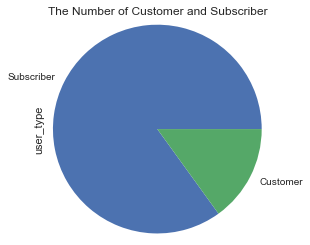

In [58]:
df_18.user_type.value_counts().plot(kind = 'pie', radius = 1.2)
plt.title('The Number of Customer and Subscriber')
plt.savefig('user_type01.png');

**Finding:<br>
Among 1,863,721 members, there are 1,583,554 subscribers (85%) and 280,167 customers (15%).**


#### Q2: What is the number of gender of members?¶

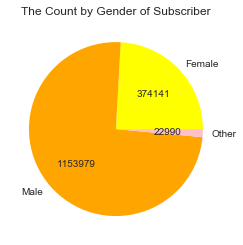

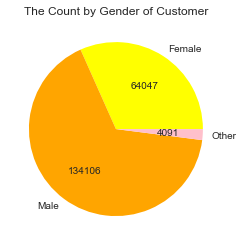

In [21]:
s_gender = df_18.query('user_type == "Subscriber"').groupby('member_gender').bike_id.count()
c_gender = df_18.query('user_type == "Customer"').groupby('member_gender').bike_id.count()
labels = ['Female', 'Male', 'Other']

def absolute_value(val):
    a  = np.round(val/100*s_gender.sum(), 0)
    return int(a)

def absolute_value_c(val):
    a  = np.round(val/100*c_gender.sum(), 0)
    return int(a)

plt.figure(0)
plt.title('The Count by Gender of Subscriber')
plt.pie(s_gender, labels = labels, autopct = absolute_value, radius = 1, colors=['yellow', 'orange', 'pink'])

plt.figure(1)
plt.title('The Count by Gender of Customer')
plt.pie(c_gender, labels = labels, autopct = absolute_value_c, radius = 1, colors=['yellow', 'orange', 'pink'])

plt.savefig('gender_01.png');

**Finding:<br>
In terms of the age, the males users are more than the female users in two user types. For customers, they have female (64,047) with the higher in-group ratio (31.7%) than the female of subscribers (374141, 24.1%).**

#### Q3 What is the number of members' ages?

In [22]:
df_18.member_age.describe()

count    1.863721e+06
mean     1.537213e+02
std      4.688814e+02
min      1.900000e+01
25%      2.900000e+01
50%      3.400000e+01
75%      4.400000e+01
max      2.019000e+03
Name: member_age, dtype: float64

In [23]:
df_18.member_age.sort_values().tail()

863635     2019
1703113    2019
1326292    2019
1703117    2019
395819     2019
Name: member_age, dtype: int64

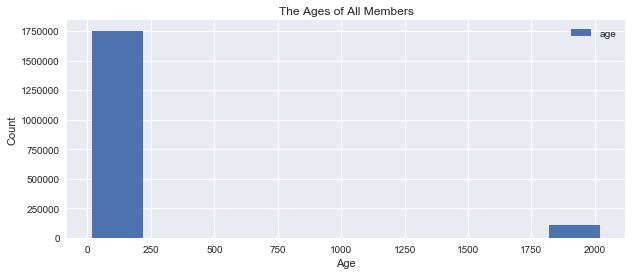

In [73]:
plt.figure(figsize = [10,4])
plt.hist(df_18.member_age, label = 'gender count')
plt.legend(['age'])
plt.xlabel("Age")  
plt.ylabel("Count")
plt.title('The Ages of All Members');

**Note: Several age values which are 2019 should be removal in the plot.**

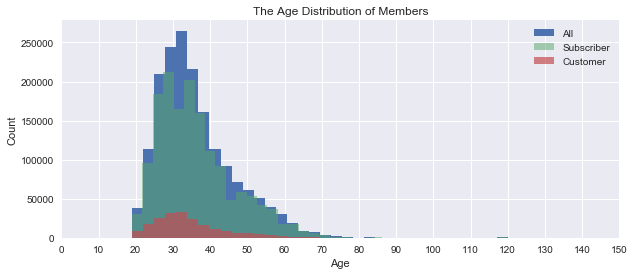

In [82]:
age = df_18.query('member_age < 2019')
x = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
plt.figure(figsize = [10,4])
plt.hist(age.member_age, bins = 40)
plt.hist(age.query('user_type == "Subscriber"').member_age, bins = 40, alpha = .5)
plt.hist(age.query('user_type == "Customer"').member_age, bins = 40, alpha = .7)
plt.legend(['All', 'Subscriber', 'Customer'])
plt.xticks(x)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('The Age Distribution of Members')
plt.savefig('age01.png');

**Finding:<br>
According to the above age distribution, most of members are 20-40 years old. For the subscriber, most of people are 25-30 and 32-35 years old.**

#### Q4: When are most popular bike time for 20-40-year-old members in terms of month of a year?

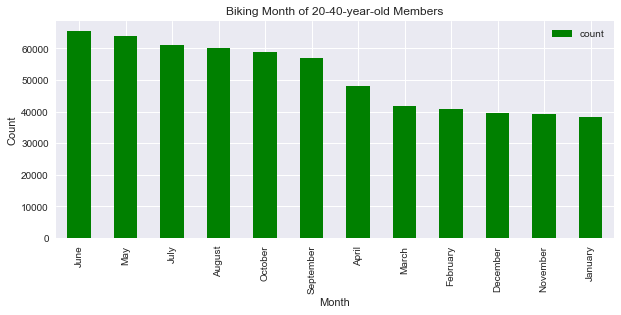

In [77]:
df_age_new = df_18.query('member_age >= 20 & member_age >= 40')
plt.figure(figsize = [10, 4])
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
         'September','October', 'November', 'December']
df_age_new.groupby('month').bike_id.count().sort_values(ascending = False).plot(kind = 'bar', color = 'g')
plt.legend(['count'])
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Biking Month of 20-40-year-old Members')
plt.savefig('Month_of_A_Year02.png');

**Finding:<br>
Delving into the 20-40-year-old group, they prefer to go to bike trip during summer, from Mau to August.**

#### Q5: When are most popular bike time for two user types in terms of time of day, day of the week, and month of a year?

**Time of a Day**

In [27]:
def plot_user_time(df, x, y, z):
    df1 = df.groupby([x, y])[z].count().reset_index().sort_values(by = z)
    #plot
    plt.figure(figsize = [10, 4])
    sns.barplot(data = df1, x = x, y = z, hue = y);

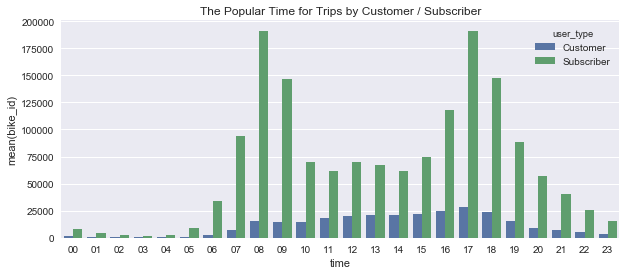

In [28]:
plot_user_time(df_18, 'time', 'user_type', 'bike_id')
plt.title('The Popular Time for Trips by Customer / Subscriber')
plt.savefig('Time_of_A_Day01.png')

**Finding:<br>
Looking to user behavior through the time of a day, for subscribers, there are two prefer time segments they ride bikes, which are 7:00 - 9:00 and 16:00 - 18:00. While for customers, they have more consistent using time, and the peak is around 17:00.**

**Day of a Month**

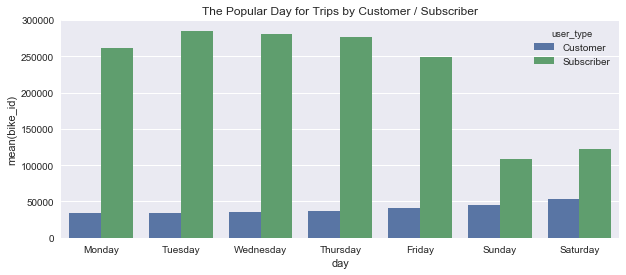

In [29]:
plot_user_time(df_18, 'day', 'user_type', 'bike_id')
plt.title('The Popular Day for Trips by Customer / Subscriber')
plt.savefig('Day_of_A_Month01.png')

**Finding:<br>
In terms of the day of a month, subscribers often ride bikes during weekday, from Monday to Friday, while customers prefer to rider bike on weekends.**

**Month of a Year**

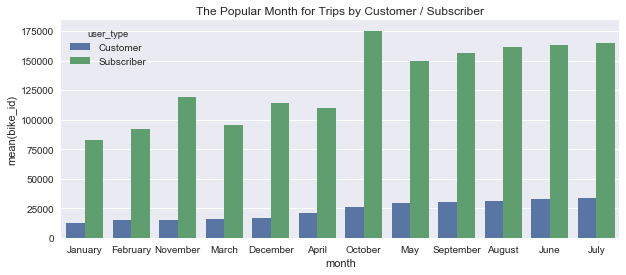

In [30]:
plot_user_time(df_18, 'month', 'user_type', 'bike_id')
plt.title('The Popular Month for Trips by Customer / Subscriber')
plt.savefig('Month_of_A_Year01.png')

**Finding:<br>
In terms of the month of a year, subscribers tend to ride bikes from summer to fall, especially on October and customers also use bike on summer more frequently.**

#### Q6: What is the duration distribution of overall / customer / subscriber?

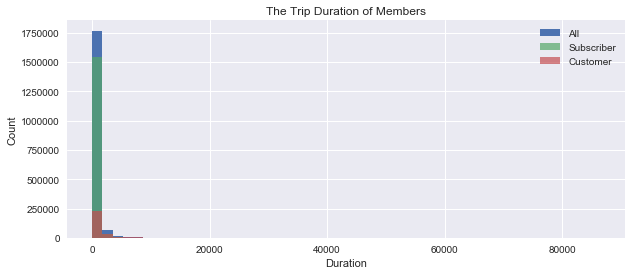

In [80]:
all_duration = df_18['duration_sec']
S_Duration = df_18.query('user_type == "Subscriber"').duration_sec
C_Duration = df_18.query('user_type == "Customer"').duration_sec

plt.figure(figsize = [10,4])
plt.hist(all_duration, bins = 50)
plt.hist(S_Duration, bins = 50, alpha = .7)
plt.hist(C_Duration, bins = 50, alpha = .7)
plt.title('The Trip Duration of Members')
plt.legend(['All', 'Subscriber', 'Customer'])
plt.xlabel('Duration')
plt.ylabel('Count')
plt.savefig('Durtion01.png');

**Finding:<br>
The majority trip duraton is located beloew 3000 second (50 min) probably because if users ride bike over 30 mins, they will be charged additional fee of using bikes.**

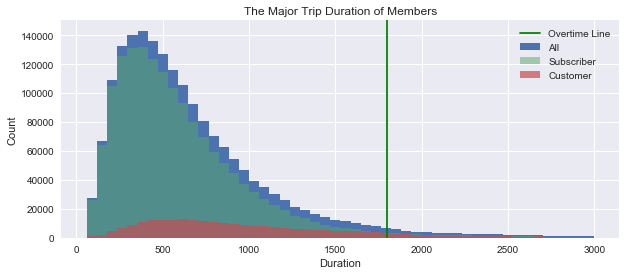

In [81]:
plt.figure(figsize = [10,4])
plt.hist(df_18[df_18['duration_sec'] < 3000].duration_sec, bins = 50)
plt.hist(S_Duration[S_Duration < 3000], bins = 50, alpha = .5)
plt.hist(C_Duration[C_Duration < 3000], bins = 50, alpha = .7)
plt.axvline(1800, color = 'g')
plt.title('The Major Trip Duration of Members')
plt.legend(['Overtime Line','All', 'Subscriber', 'Customer'])
plt.xlabel('Duration')
plt.ylabel('Count')
plt.savefig('Durtion02.png');

**Finding:<br>
So let's look deeper into those who ride bikes under 3000 sec and plot the 30 min line to see how many people ride overtime. According to the above plot, most of people use bike within 5-10 minutes. They might only use bikes for the short-distance trip.**

#### Q7: How long does the average trip take in overall / by customer and subscriber?

The average time of trip in overall: 857.3025710393348

Plot those whose duration is less than 3000 sec:


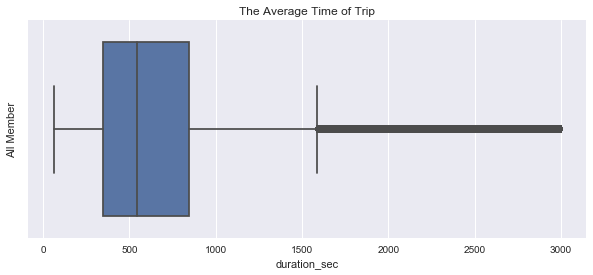

In [84]:
print('The average time of trip in overall: ' + repr(df_18.duration_sec.mean()))
print()
print('Plot those whose duration is less than 3000 sec:')
plt.figure(figsize = [10,4])
sns.boxplot(df_18[df_18.duration_sec <3000].duration_sec)
plt.title('The Average Time of Trip')
plt.ylabel('All Member')
plt.savefig('AvgTime01.png');

The average time of trip for customers: 1922.7795279244165
The average time of trip for subscribers: 668.7952750585076

Plot those whose duration is less than 3000 sec:


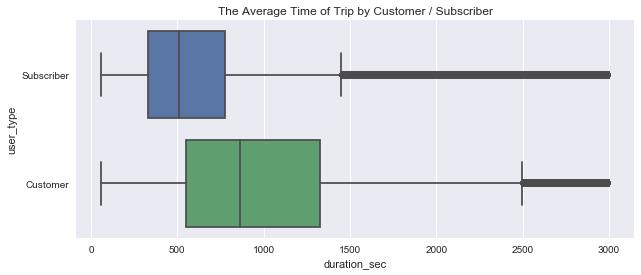

In [34]:
print('The average time of trip for customers: ' + repr(C_Duration.mean()))
print('The average time of trip for subscribers: ' + repr(S_Duration.mean()))
print()
print('Plot those whose duration is less than 3000 sec:')
plt.figure(figsize = [10,4])
sns.boxplot( x = df_18[df_18.duration_sec <3000].duration_sec, y = df_18.user_type)
plt.title('The Average Time of Trip by Customer / Subscriber')
plt.savefig('AvgTime02.png');

**Finding: <br>
The average time of trip for customers: 1923 sec (32 min). The average time of trip for subscribers: 669 sec (11 min). So apparently, as opposed to subscribers, more customers have overtime ride partly due to the different charging mechnism for this group of users. They joined the membership program of GoBike, so they pay lower if they rider overtime.**

#### Q8: What is the number of overtime by subscriber and customer?

In [35]:
print('Overall:')
print('The number of those who use bike within 30 minutes: ' + repr(all_duration[all_duration <= 1800].count()))
print('The number of those who use bike over 30 minutes: ' + repr(all_duration[all_duration > 1800].count()))
print()
print('Subscriber:')
print('The number of subscribers use bike within 30 minutes: ' + repr(S_Duration[S_Duration <= 1800].count()))
print('The number of subscribers use bike over 30 minutes: ' + repr(S_Duration[S_Duration > 1800].count()))
print()
print('Customer:')
print('The number of customers use bike within 30 minutes: ' + repr(C_Duration[C_Duration <= 1800].count()))
print('The number of customers use bike over 30 minutes: ' + repr(C_Duration[C_Duration > 1800].count()))

Overall:
The number of those who use bike within 30 minutes: 1768534
The number of those who use bike over 30 minutes: 95187

Subscriber:
The number of subscribers use bike within 30 minutes: 1542335
The number of subscribers use bike over 30 minutes: 41219

Customer:
The number of customers use bike within 30 minutes: 226199
The number of customers use bike over 30 minutes: 53968


In [36]:
df1 = df_18[['duration_sec', 'user_type']]
df3 = df1[df1['duration_sec'] <= 1800].groupby('user_type').count()
df3.rename(columns = {'duration_sec': 'within 30 mins'}, inplace = True);
df4 = df1[df1['duration_sec'] > 1800].groupby('user_type').count()
df4.rename(columns = {'duration_sec': 'over 30 mins'}, inplace = True)


In [37]:
df5 = df4.join(df3)
df5['total'] = df5['within 30 mins'] + df5['over 30 mins']
df5.loc['Total'] = df5.sum()
df5

,over 30 mins,within 30 mins,total
user_type,,,
Customer,53968,226199,280167
Subscriber,41219,1542335,1583554
Total,95187,1768534,1863721


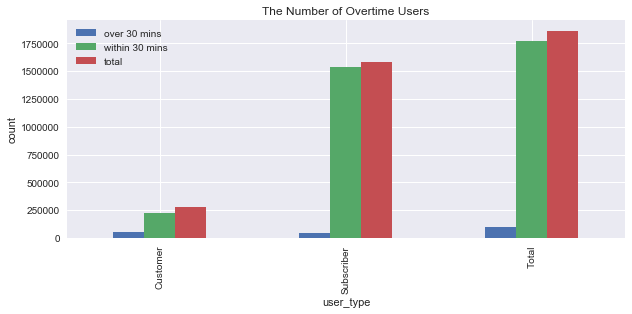

In [85]:
df5.plot(kind = 'bar', figsize = [10,4])
plt.title('The Number of Overtime Users')
plt.ylabel('count')
plt.savefig('Overtime01.png');

**Overtime Percentage by User Type**

In [39]:
df6 = df5.copy()
df6.drop('total', axis = 1, inplace = True)

In [40]:
df6.iloc[0,0] = df5.iloc[0,0] / df5.iloc[2,0]
df6.iloc[1,0] = df5.iloc[1,0] / df5.iloc[2,0]
df6.iloc[2,0] = df5.iloc[2,0] / df5.iloc[2,0]

df6.iloc[0,1] = df5.iloc[0,1] / df5.iloc[2,1]
df6.iloc[1,1] = df5.iloc[1,1] / df5.iloc[2,1]
df6.iloc[2,1] = df5.iloc[2,1] / df5.iloc[2,1]

In [41]:
df6

,over 30 mins,within 30 mins
user_type,,
Customer,0.566968,0.127902
Subscriber,0.433032,0.872098
Total,1.000000,1.000000


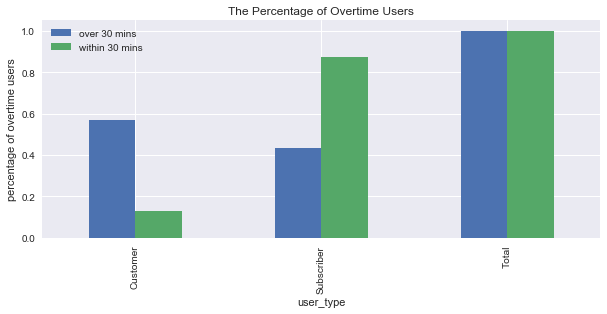

In [87]:
df6.plot(kind = 'bar', figsize = [10,4])
plt.title('The Percentage of Overtime Users')
plt.ylabel('percentage of overtime users')
plt.savefig('Overtime02.png');

**Finding:<br>
Nearly 56.7% customers ride bikes over 30 minutes. So consistent to the findings in the previous plots, it is more likely for customers to rider overtime due to their membership.**

#### Q9: How many people return their bikes at the same station they start their trip?

In [43]:
print('The number of users who return bike at the same station: ' + repr(df_18.query('start_station_name == end_station_name').start_station_id .count()))
print('The number of users who return bike at different station: ' + repr(df_18.query('start_station_name != end_station_name').start_station_id .count()))
print()
print('The number of customers who return bike at the same station: ' + repr(df_18.query('start_station_name == end_station_name & user_type == "Customer"').start_station_id .count()))
print('The number of customers who return bike at different station: ' + repr(df_18.query('start_station_name != end_station_name & user_type == "Customer"').start_station_id .count()))
print()
print('The number of subscribers who return bike at the same station: ' + repr(df_18.query('start_station_name == end_station_name & user_type == "Subscriber"').start_station_id .count()))
print('The number of subscribers who return bike at different station: ' + repr(df_18.query('start_station_name != end_station_name & user_type == "Subscriber"').start_station_id .count()))



The number of users who return bike at the same station: 52041
The number of users who return bike at different station: 1799909

The number of customers who return bike at the same station: 23222
The number of customers who return bike at different station: 253737

The number of subscribers who return bike at the same station: 28819
The number of subscribers who return bike at different station: 1546172


In [44]:
df_12 = df_18.query('start_station_name == end_station_name')[['user_type','bike_id']]
df_13 = df_18.query('start_station_name != end_station_name')[['user_type','bike_id']]
#one-way: pickup and dropoff at the same place
df_12.groupby('user_type').count()

,bike_id
user_type,
Customer,23222
Subscriber,28819


In [45]:
#pickup and dropoff at the different place
df_13.groupby('user_type').count()

,bike_id
user_type,
Customer,256945
Subscriber,1554735


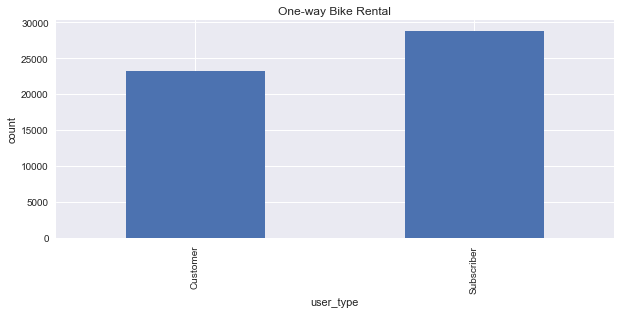

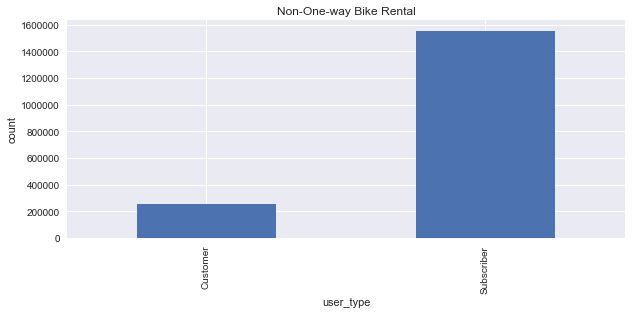

In [92]:
df_12.groupby('user_type').count().plot(kind = 'bar', figsize = [10,4], legend = False, title = 'One-way Bike Rental')
plt.ylabel('count')
df_13.groupby('user_type').count().plot(kind = 'bar', figsize = [10,4], legend = False, title = 'Non-One-way Bike Rental')
plt.ylabel('count')
plt.savefig('OneWay01.png');


**Finding:<br>
Most of people choose to return bikes at the same station they rent the bikes, especially for the subscriber. Yet only look to one-way rental, it is more likely for customers to return their bike at the different station they rent the bike. Maybe it is because that customers tend to have long-distance trips, so it will be more convenient for them to return at the different stations.**

#### Q10: How many stations in total? Which station is the most popular one?

The total station number: 331


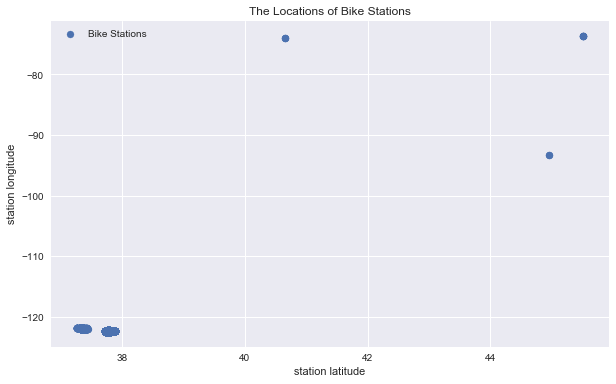

In [100]:
print('The total station number: ' + repr(df_18['start_station_id'].nunique()))
plt.figure(figsize = [10,6])
plt.scatter(df_18['start_station_latitude'], df_18['start_station_longitude'])
plt.title('The Locations of Bike Stations')
plt.legend(['Bike Stations'])
plt.xlabel('station latitude')
plt.ylabel('station longitude')
plt.savefig('Station01.png');

**Filter out the docks in San Francisco Bay Area**

In [48]:
max_longitude_sf = -122.3597
min_longitude_sf = -122.5147
max_latitude_sf = 37.8121
min_latitude_sf = 37.7092

In [49]:
start_lat = (df_18['start_station_latitude']>=min_latitude_sf) & (df_18['start_station_latitude']<=max_latitude_sf)
end_lat = (df_18['end_station_latitude']>=min_latitude_sf) & (df_18['end_station_latitude']<=max_latitude_sf)
start_lon = (df_18['start_station_longitude']>=min_longitude_sf) & (df_18['start_station_longitude']<=max_longitude_sf)
end_lon = (df_18['end_station_longitude']>=min_longitude_sf) & (df_18['end_station_longitude']<=max_longitude_sf)

df_sf = df_18[start_lat & end_lat & start_lon & end_lon]
df_sf.start_station_latitude.max(), df_sf.start_station_latitude.min(), df_sf.start_station_longitude.max(), df_sf.start_station_longitude.min()


(37.80477, 37.72925213437004, -122.38565549254416, -122.473658)

In [50]:
df_sf.head(1)

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,time,day,month
0,0,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,...,-122.40257,1035,Subscriber,1988.0,Male,No,31,23,Wednesday,February


The total station number in San Francisco: 156


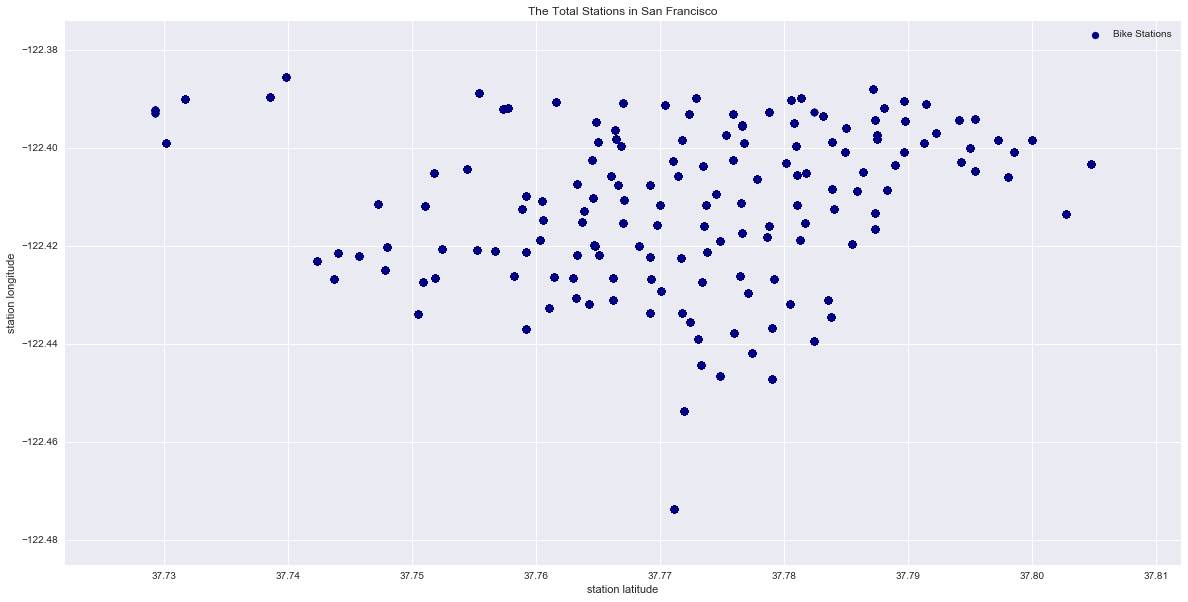

In [101]:
print('The total station number in San Francisco: ' + repr(df_sf['start_station_id'].nunique()))

plt.figure(figsize = [20,10])
plt.scatter(df_sf['start_station_latitude'], df_sf['start_station_longitude'], color = 'navy')
plt.title('The Total Stations in San Francisco')
plt.legend(['Bike Stations'])
plt.xlabel('station latitude')
plt.ylabel('station longitude');

In [52]:
df_sf_top = pd.DataFrame(df_18['start_station_name'].value_counts())
df_sf_top = df_sf_top.reset_index().rename(columns = {'index':'start_station_name', 'start_station_name':'count'})

In [53]:
df_sf_top.head().start_station_name

0    San Francisco Ferry Building (Harry Bridges Pl...
1    San Francisco Caltrain Station 2  (Townsend St...
2       San Francisco Caltrain (Townsend St at 4th St)
3                                 Market St at 10th St
4                                   Berry St at 4th St
Name: start_station_name, dtype: object

**Top 5 most popular stations in SF**

In [54]:
df_top5 = df_18.query('start_station_name == ["San Francisco Ferry Building (Harry Bridges Plaza)" ,"San Francisco Caltrain Station 2  (Townsend St at 4th St)", "San Francisco Caltrain (Townsend St at 4th St)", "Market St at 10th St", "Berry St at 4th St"]')


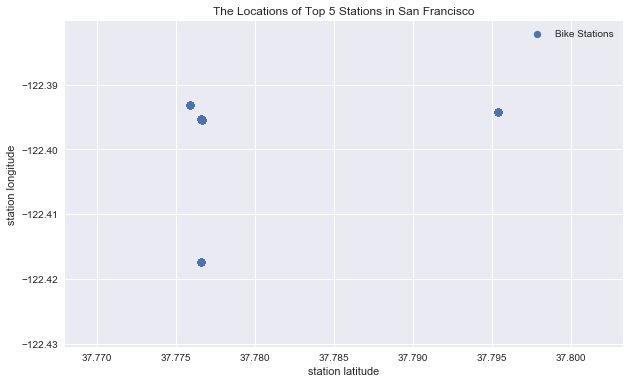

In [102]:
name = [[df_top5['start_station_latitude'], df_top5['start_station_longitude']]]

plt.figure(figsize = [10,6])
plt.scatter(df_top5['start_station_latitude'], df_top5['start_station_longitude'])
plt.title('The Locations of Top 5 Stations in San Francisco')
plt.legend(['Bike Stations'])
plt.xlabel('station latitude')
plt.ylabel('station longitude')
plt.savefig('Station03.png');

The total station number in San Francisco: 156


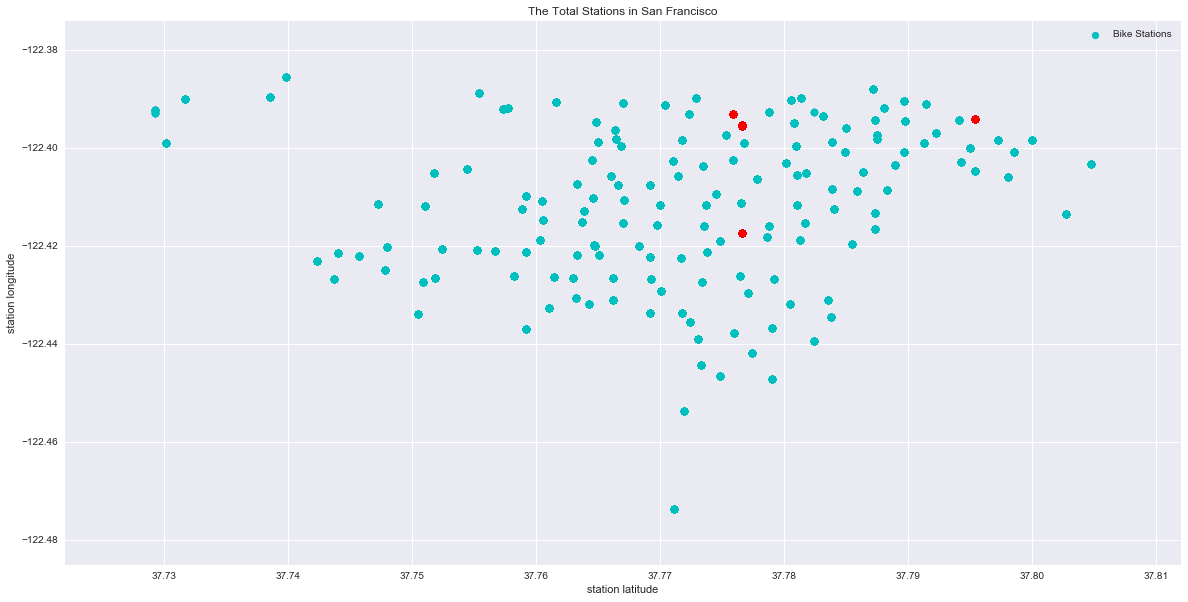

In [103]:
#find top 5 stations among all sf stations
print('The total station number in San Francisco: ' + repr(df_sf['start_station_id'].nunique()))

plt.figure(figsize = [20,10])
plt.scatter(df_sf['start_station_latitude'], df_sf['start_station_longitude'], color = 'c')
#highlight top 5 stations
plt.scatter(df_top5['start_station_latitude'], df_top5['start_station_longitude'], color = 'r')
plt.title('The Top 5 Popular Stations in San Francisco')
plt.title('The Total Stations in San Francisco')
plt.legend(['Bike Stations'])
plt.xlabel('station latitude')
plt.ylabel('station longitude')
plt.savefig('Station02.png');


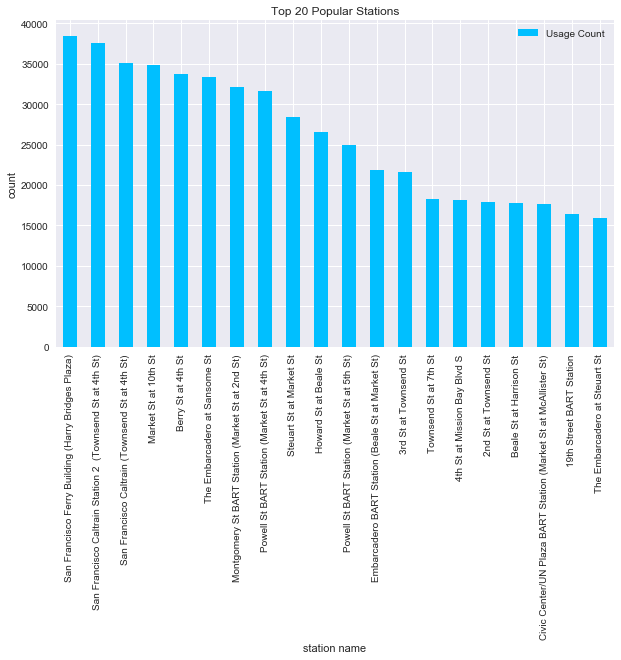

In [104]:
top_20 = df_18['start_station_name'].value_counts().head(20)
plt.figure(figsize = [10,6])
top_20.plot(kind = 'bar', color = 'deepskyblue')
plt.title('Top 20 Popular Stations')
plt.legend(['Usage Count'])
plt.xlabel('station name')
plt.ylabel('count')
plt.savefig('Station04.png');

**Finding:
Over half of the bike stations are located in San Francisco city, which is 156 stations in total. The top 5 popular docks are all in San Francisco as well and three of them are near to each other.** 